In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union



Get stock data from yahoo finance library

In [2]:
def get_stock(stock_symbol, start, end):
  stock_data = yf.download(stock_symbol, start=start, end=end)
  # print(stock_data)
  stock_data['Daily return'] = stock_data['Close'].pct_change()
  # drop NaN in daily return
  stock_data = stock_data.dropna()

  # expect return
  # expect_return = stock_data['Daily return'].mean()
  return stock_data



In [5]:
stock_data = get_stock('AAPL', start='2020-01-01', end='2025-01-01')
stock_data


[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume,Daily return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800,-0.009722
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,0.007968
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,-0.004703
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,0.016086
2020-01-09,74.962799,75.156480,74.132383,74.384166,170108400,0.021241
...,...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176


In [4]:
p_win = 0
for ret in stock_data['Daily return']:
  if ret > 0: p_win += 1

p_win /= len(stock_data['Daily return'])
p_loss = 1 - p_win
print(p_win, p_loss)

0.5330151153540175 0.46698488464598253


Plot for closing price

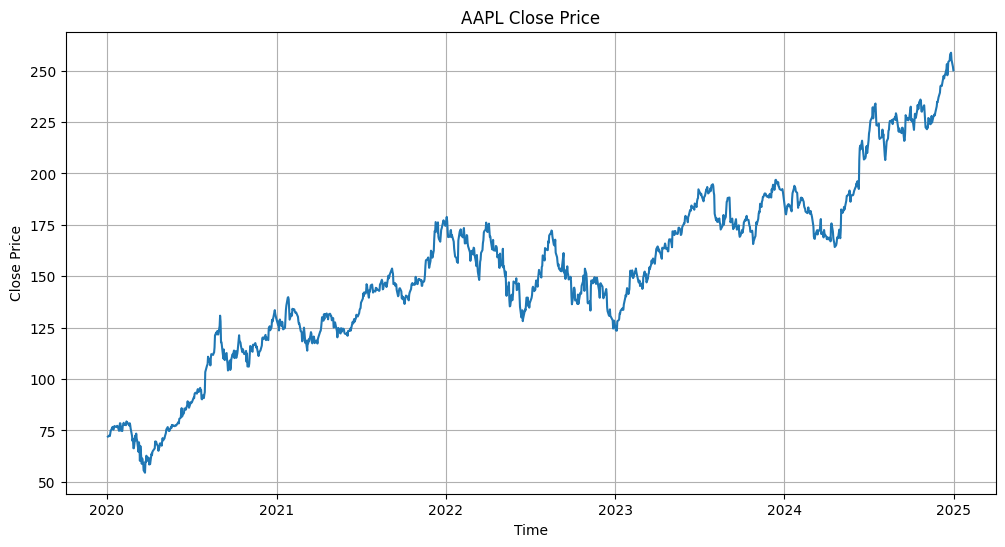

In [ ]:
# plot Close price
df = get_stock('AAPL', )
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.grid(True)
plt.show()


Plot for price change

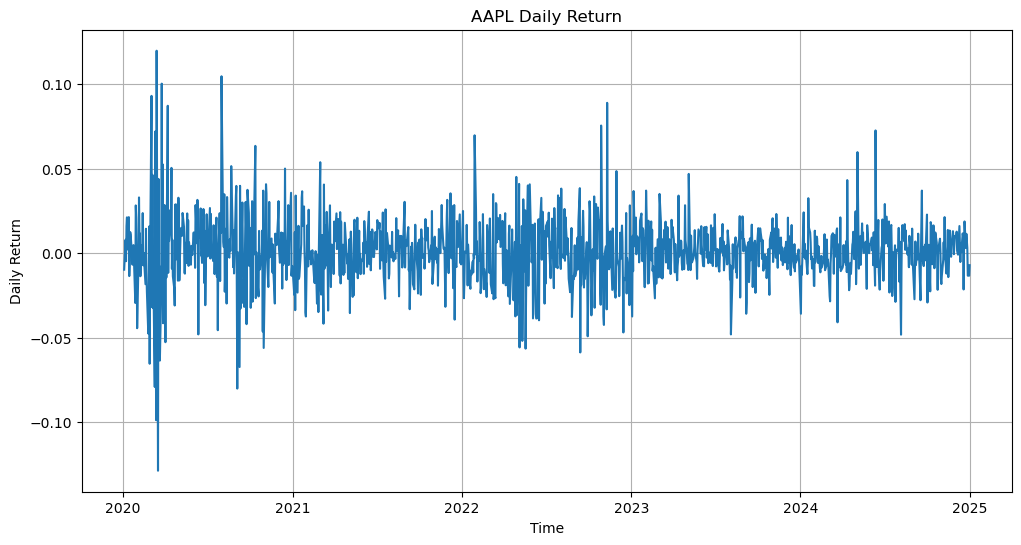

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Daily return'])
plt.xlabel('Time')
plt.ylabel('Daily Return')
plt.title('AAPL Daily Return')
plt.grid(True)
plt.show()


In [ ]:
# Step 3: Define the rolling window for Kelly computation
#new

def kelly_fraction():
    window = 300  # 300-day rolling window
    rf_annual = 0.02  # Assume 2% annual risk-free rate
    rf_daily = (1 + rf_annual) ** (1/252) - 1  # Convert to daily

    # Step 4: Compute rolling mean (expected return) and variance
    stock_data["Mean_Return"] = stock_data["Daily return"].rolling(window=window, min_periods=window).mean()
    stock_data["Variance"] = stock_data["Daily return"].rolling(window=window, min_periods=window).var()

    # Step 5: Compute Kelly Fraction
    stock_data["Kelly_Fraction"] = (stock_data["Mean_Return"] - rf_daily) / (stock_data["Variance"] + 1e-8)  # Avoid division by zero
    return stock_data

# Step 6: Display last few Kelly values
print(stock_data[["Kelly_Fraction"]].dropna().tail(10))

Price      Kelly_Fraction
Ticker                   
Date                     
2024-12-17       6.465920
2024-12-18       6.085535
2024-12-19       6.070835
2024-12-20       6.283703
2024-12-23       6.536687
2024-12-24       6.742465
2024-12-26       6.967855
2024-12-27       6.846790
2024-12-30       6.625432
2024-12-31       6.783563
